In [1]:
### Read in experimental parameters from plate plan file
### Create lists of column & row names, enzyme names, enzyme & substrate conc 
### Convert units to standard units (molar and min^-1)
### Calculate e_405 for nitrophenol at given pH

import pandas as pd
#!wget https://raw.githubusercontent.com/blinkletter/StealThisCode/main/BiochemToolbox.py
#!pip install uncertainties  # to install 'Uncertainties' package in Colab. 
import BiochemToolbox as BT
import numpy as np

file_location = ""
file_name = "PlatePlan0.csv"
pH = 7.0

df, plate, e_NPA = BT.read_plate_setup(file_location+file_name, pH)



['10', '11', '12']
10
11
12


,Column,Row,slope,slope stderr,int,int stderr,RSQ
0,10,A,0.001667,0.000371,-0.001001,0.000745,0.573057
1,10,B,0.001394,0.000231,0.001796,0.000463,0.708544
2,10,C,0.003047,0.000238,0.000387,0.000478,0.916146
3,10,D,0.004512,0.000295,-0.000623,0.000592,0.939750
4,10,E,0.006538,0.000211,0.000421,0.000424,0.984556
5,10,F,0.008537,0.000232,-0.000583,0.000465,0.989053
6,10,G,0.010777,0.000534,-0.000491,0.001072,0.964431
7,10,H,0.014622,0.000273,-0.000958,0.000547,0.994817
8,11,A,0.001228,0.000314,-0.000325,0.000630,0.505105
9,11,B,0.001975,0.000277,-0.000454,0.000555,0.772691


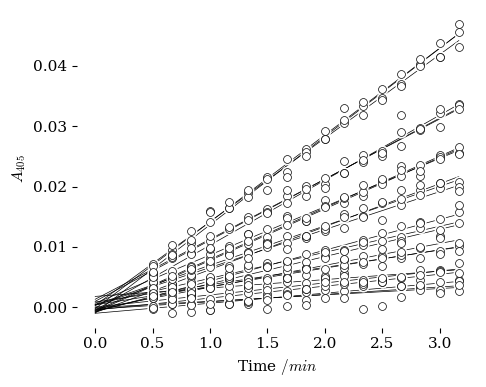

In [3]:
### Plot initial rates for a lane

import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

Column_list = ["10","11","12"]
#Row_list = ["A","B","C"]

Row_list = plate["row_name_list"]

Fraction_time_span = 0.05


data_file_location = "data1/"
data_file_root_name = "data"

plot_file = "plot_initial_rate"


plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now
plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax, result = BT.plot_lanes(ax, data_file_location+data_file_root_name, 
                        Column_list, Row_list, 
                        Fraction_time_span = 0.05, Line_Fit = True)
display(result)  

ax.set(xlabel= r"Time $/min$",  
       ylabel=r"$A_{405}$",
 #          title = "Lane # "+lane_name,
       xlim=[None, None],                  
       ylim=[None, None]      
        )

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file + ".pdf")     ### export the plot as this
plt.show()



slope = 0.00407 +/- 0.000362


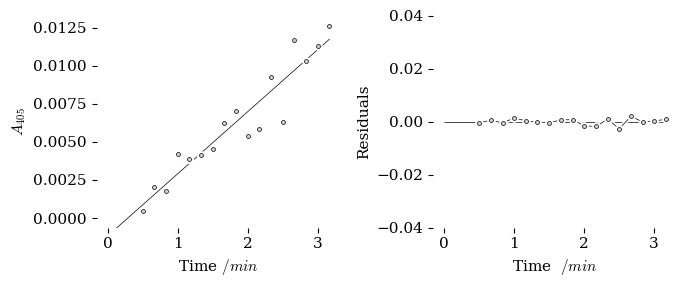

In [22]:
### Analysis of a single cell with slope and differentials

##########################################
### Change these settings
##########################################

lane_name = "4"
row_name = "A"
Fraction_time_span = 0.05

data_name = "data1/data"
plot_file = "plot1/Cell_w_residuals"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, slope, int):
    return slope*x + int

def linear_function_int0(x, slope):
    return slope*x


plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now
plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))  

in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
df = pd.read_csv(in_file_name)

points_used = int(Fraction_time_span * len(df["time"]))

x = df["time"][0:points_used]
y = df["abs"][0:points_used]

param,cov = curve_fit(linear_function, x,y)
slope, intercept = param

##param,cov = curve_fit(linear_function_int0, x,y)
##[slope] = param


perr = np.sqrt(np.diag(cov))
slope_stderr, int_stderr = perr
print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")
##print(f"slope = {slope:0.3g}")
x_fit = np.linspace(0,np.max(x),10)

ax[0].plot(x_fit, linear_function(x_fit, slope, intercept), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[0].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

residuals = y - linear_function(x, slope, intercept)
y = residuals
ax[1].hlines(0, xmin = 0, xmax = np.max(x), 
             colors='black', linestyles='solid', 
             linewidths = 0.5, zorder = 0)
ax[1].plot(x, y, 
        linestyle = '-', 
        linewidth='3', 
        color = 'white', 
        zorder = 1)
ax[1].plot(x, y, 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 1)
ax[1].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 3)
ax[1].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 2)
ax[1].set(xlabel= r"Time  $/min$", 
          ylabel="Residuals",
 #         title = "Lane # "+lane_name,
 #         xlim=[None, None],                  
          ylim=[-.04, +0.04])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+"_"+row_name+".pdf")     ### export the plot as this
plt.show()

slope = 0.00543 +/- 4.6e-05
slope = 0.00619 +/- 0.000441


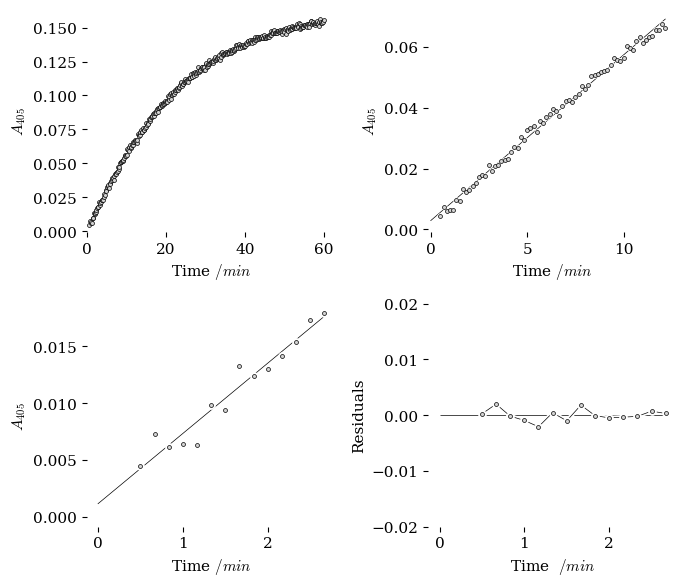

In [5]:
### Analysis of a single cell with slope and differentials

##########################################
### Change these settings
##########################################

lane_name = "10"
row_name = "B"
Fraction_time_span = 0.04

data_name = "data1/data"
plot_file = "plot1/Cell_w_residuals"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, slope, int):
    return slope*x + int

def linear_function_int0(x, slope):
    return slope*x


plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,6))  

in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
df = pd.read_csv(in_file_name)

points_used = int(Fraction_time_span * len(df["time"]))
points_used2 = int(0.2 * len(df["time"]))


x_all = df["time"]
y_all = df["abs"]

x = x_all[0:points_used]
y = y_all[0:points_used]

x2 = x_all[0:points_used2]
y2 = y_all[0:points_used2]

#########################################################################


ax[0][0].scatter(x_all, y_all, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0][0].scatter(x_all, y_all, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[0][0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

#########################################################################

param,cov = curve_fit(linear_function, x2,y2)
slope2, intercept2 = param


perr = np.sqrt(np.diag(cov))
slope_stderr2, int_stderr2 = perr
print(f"slope = {slope2:0.3g} +/- {slope_stderr2:0.3g}")

x_fit = np.linspace(0,np.max(x2),10)

ax[0][1].plot(x_fit, linear_function(x_fit, slope2, intercept2), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[0][1].scatter(x2, y2, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0][1].scatter(x2, y2, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=16, 
        zorder = 1)
ax[0][1].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )


#########################################################################

param,cov = curve_fit(linear_function, x,y)
slope, intercept = param


perr = np.sqrt(np.diag(cov))
slope_stderr, int_stderr = perr
print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")

x_fit = np.linspace(0,np.max(x),10)

ax[1][0].plot(x_fit, linear_function(x_fit, slope, intercept), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[1][0].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[1][0].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[1][0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

#########################################################################

#x=x2; y=y2; slope=slope2; intercept=intercept2

residuals = y - linear_function(x, slope, intercept)
y = residuals
ax[1][1].hlines(0, xmin = 0, xmax = np.max(x), 
             colors='black', linestyles='solid', 
             linewidths = 0.5, zorder = 0)
ax[1][1].plot(x, y, 
        linestyle = '-', 
        linewidth='3', 
        color = 'white', 
        zorder = 1)
ax[1][1].plot(x, y, 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 1)
ax[1][1].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 3)
ax[1][1].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 2)
ax[1][1].set(xlabel= r"Time  $/min$", 
          ylabel="Residuals",
 #         title = "Lane # "+lane_name,
 #         xlim=[None, None],                  
          ylim=[-.02, +0.02]
           )

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+"_"+row_name+".pdf")     ### export the plot as this
plt.show()

In [10]:
import random
import string

for x in range(12):
   random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=3))
   print(random_string)


rNV
oaO
z1n
CrO
FWY
GZQ
ZXr
n5l
4JL
X9n
sXT
9bP
